Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec4c86df10>]],
      dtype=object)

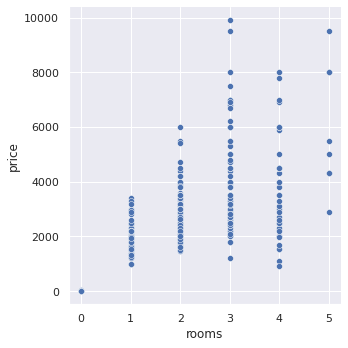

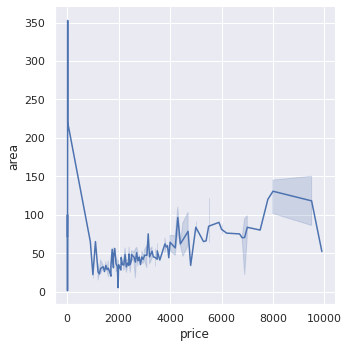

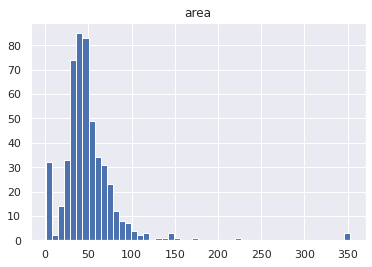

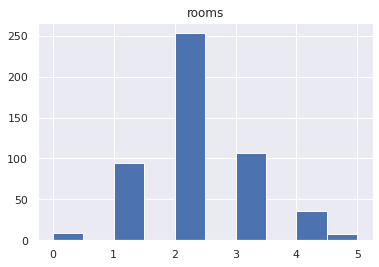

In [43]:
import json
import re
import pandas as pd
import urllib
from urllib.request import Request
from bs4 import BeautifulSoup
import seaborn as sns


url="https://www.otodom.pl/pl/oferty/wynajem/mieszkanie/krakow?page="

pages = []
for page_number in range(1, 14):
    print(f'Pobieranie strony {page_number}')
    with urllib.request.urlopen(f'{url}{page_number}') as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        pages.append(processed_page)



#print(pages[1].prettify())           #soup prettify - zwraca sparsowane drzewo przeformatowane na stringa w UniCode

full_flat_data = []
for page in pages:
    full_flat_data += page.find_all(class_='css-p74l73 es62z2j17')       # to sa tagi <li> </li> zawierajace liste HTML'a z artykulami

flats_data = []
oferty=[]                                               #Lista Z Ofertami

for flat_html in full_flat_data:
    flat = {}
    artykul=flat_html.find('article')                   #artykuly z ofertami
    oferty.append(artykul)
    flat['name'] = flat_html.find(class_="css-1rhznz4").text.strip()            #strip() - usuwamy sobie spacje
    flat['location'] = flat_html.find(class_="css-17o293g es62z2j9").text.strip()
    flat['price'] =  int(re.findall(r'\d+', flat_html.find(class_="css-rmqm02 eclomwz0").text)[0])
    flat['rooms'] = int(re.findall(r'\d+', flat_html.find(class_="css-itig98 eclomwz1").text)[1])
    #mydivs = flat_html.find_all("div", {"class": "css-itig98 eclomwz1"})
    #print(mydivs)
    flat['area'] = int(re.findall(r'\d+ m²', flat_html.find(class_="css-itig98 eclomwz1").text)[0].replace(' m²',''))
    flat['url'] = f"https://otodom.pl{flat_html.a['href']}"
    
    flats_data.append(flat)

# Dla tej Klasy DIVA mamy 3 wartosci informacji z danymi
#<div class="css-itig98 eclomwz1">
# <span class="css-rmqm02 eclomwz0">3800&nbsp;zł/mc</span>
# <span class="css-rmqm02 eclomwz0">4 pokoje</span>
# <span class="css-rmqm02 eclomwz0">66 m²</span></div>



mieszkania = pd.DataFrame.from_dict(flats_data)
mieszkania.head(10)
mieszkania.dropna()


sns.relplot(
    data=mieszkania, x="rooms", y="price",
    palette=["b", "r"], sizes=(10, 100)
)




sns.set_theme()

g = sns.relplot(
    data=mieszkania,
    x="price", y="area",kind='line',
    height=5)

g.set_axis_labels("price", "area")



mieszkania.hist(column='area', bins=50)
mieszkania.hist(column='rooms', bins=10)